# Stock Market Analysis and Prediction: A2Z Infra Engineering Ltd.

## Introduction

In this project, we will analyze and predict stock prices for A2Z Infra Engineering Ltd (A2ZINFRA.BO) using historical stock market data. The data contains information on daily stock prices and trading volume, which will be used to gain insights into the stock's performance over time and to develop models for predicting future stock prices.

### Dataset

The dataset includes the following columns:
- **Date**: The date of the trading day.
- **Open**: The opening price of the stock on that day.
- **High**: The highest price of the stock on that day.
- **Low**: The lowest price of the stock on that day.
- **Close**: The closing price of the stock on that day.
- **Adj Close**: The adjusted closing price of the stock on that day (adjusted for dividends and stock splits).
- **Volume**: The number of shares traded on that day.


### Objectives

1. **Data Exploration and Visualization**:
   - Explore the dataset to understand the structure and basic statistics.
   - Visualize the stock price trends over time.
   - Identify any patterns, trends, or anomalies in the data.

2. **Data Preprocessing**:
   - Handle missing values, if any.
   - Normalize/standardize the data for modeling.
   - Create additional features, if necessary, to enhance the model.

3. **Time Series Analysis**:
   - Decompose the time series to understand its components (trend, seasonality, noise).
   - Check for stationarity and make the series stationary if required.

4. **Modeling and Forecasting**:
   - Split the data into training and testing sets.
   - Develop time series forecasting models such as ARIMA, SARIMA, or LSTM.
   - Evaluate the models using appropriate metrics (e.g., RMSE, MAE).

5. **Conclusion and Future Work**:
   - Summarize the findings from the analysis and modeling.
   - Discuss the limitations of the current approach and potential improvements for future work.

### Tools and Libraries

- **Pandas**: For data manipulation and analysis.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning and model evaluation.
- **Statsmodels**: For statistical modeling and time series analysis.

Let's begin by loading the dataset and performing some initial exploratory data analysis (EDA).



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df=pd.read_csv('A2ZINFRA.BO.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-23,390.000000,398.899994,318.649994,328.899994,326.075012,21416800
1,2010-12-24,331.000000,350.350006,324.399994,333.000000,330.139801,5892800
2,2010-12-27,337.000000,340.000000,320.100006,324.700012,321.911102,1069873
3,2010-12-28,325.000000,328.899994,316.399994,318.200012,315.466919,854089
4,2010-12-29,319.700012,322.950012,314.549988,316.149994,313.434509,562564


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2318,2020-06-01,4.21,4.31,4.15,4.29,4.29,59840
2319,2020-06-02,4.35,4.50,4.32,4.49,4.49,84423
2320,2020-06-03,4.61,4.70,4.46,4.70,4.70,104237
2321,2020-06-04,4.70,4.90,4.47,4.48,4.48,64078
2322,2020-06-05,4.56,4.60,4.36,4.50,4.50,40810


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2323 non-null   datetime64[ns]
 1   Open       2323 non-null   float64       
 2   High       2323 non-null   float64       
 3   Low        2323 non-null   float64       
 4   Close      2323 non-null   float64       
 5   Adj Close  2323 non-null   float64       
 6   Volume     2323 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 127.2 KB


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2323,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2.323000e+03
mean,2015-09-10 05:23:34.894532864,52.511752,53.927753,51.024697,52.119862,51.944791,1.985875e+05
min,2010-12-23 00:00:00,3.000000,3.150000,2.820000,3.020000,3.020000,0.000000e+00
25%,2013-05-02 12:00:00,14.370000,14.790000,13.780000,14.125000,14.125000,4.371350e+04
50%,2015-09-08 00:00:00,25.400000,26.250000,24.750000,25.129999,25.129999,9.331600e+04
75%,2018-01-16 12:00:00,43.900002,45.150000,42.925001,43.599998,43.599998,2.026600e+05
max,2020-06-05 00:00:00,390.000000,398.899994,334.649994,337.250000,334.353302,2.141680e+07
std,NaN,69.172223,71.111969,67.345741,68.643932,68.117996,5.453618e+05


In [10]:
df['Date'].dtype

dtype('<M8[ns]')

In [11]:
df['Daily return']=df['Close'].pct_change()

In [12]:

df['Year']=df['Date'].dt.year

In [13]:
df['Date'].unique()

<DatetimeArray>
['2010-12-23 00:00:00', '2010-12-24 00:00:00', '2010-12-27 00:00:00',
 '2010-12-28 00:00:00', '2010-12-29 00:00:00', '2010-12-30 00:00:00',
 '2010-12-31 00:00:00', '2011-01-03 00:00:00', '2011-01-04 00:00:00',
 '2011-01-05 00:00:00',
 ...
 '2020-05-22 00:00:00', '2020-05-26 00:00:00', '2020-05-27 00:00:00',
 '2020-05-28 00:00:00', '2020-05-29 00:00:00', '2020-06-01 00:00:00',
 '2020-06-02 00:00:00', '2020-06-03 00:00:00', '2020-06-04 00:00:00',
 '2020-06-05 00:00:00']
Length: 2323, dtype: datetime64[ns]

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily return,Year
0,2010-12-23,390.000000,398.899994,318.649994,328.899994,326.075012,21416800,NaN,2010
1,2010-12-24,331.000000,350.350006,324.399994,333.000000,330.139801,5892800,0.012466,2010
2,2010-12-27,337.000000,340.000000,320.100006,324.700012,321.911102,1069873,-0.024925,2010
3,2010-12-28,325.000000,328.899994,316.399994,318.200012,315.466919,854089,-0.020018,2010
4,2010-12-29,319.700012,322.950012,314.549988,316.149994,313.434509,562564,-0.006443,2010


## Visualize data 

### Time series  chart

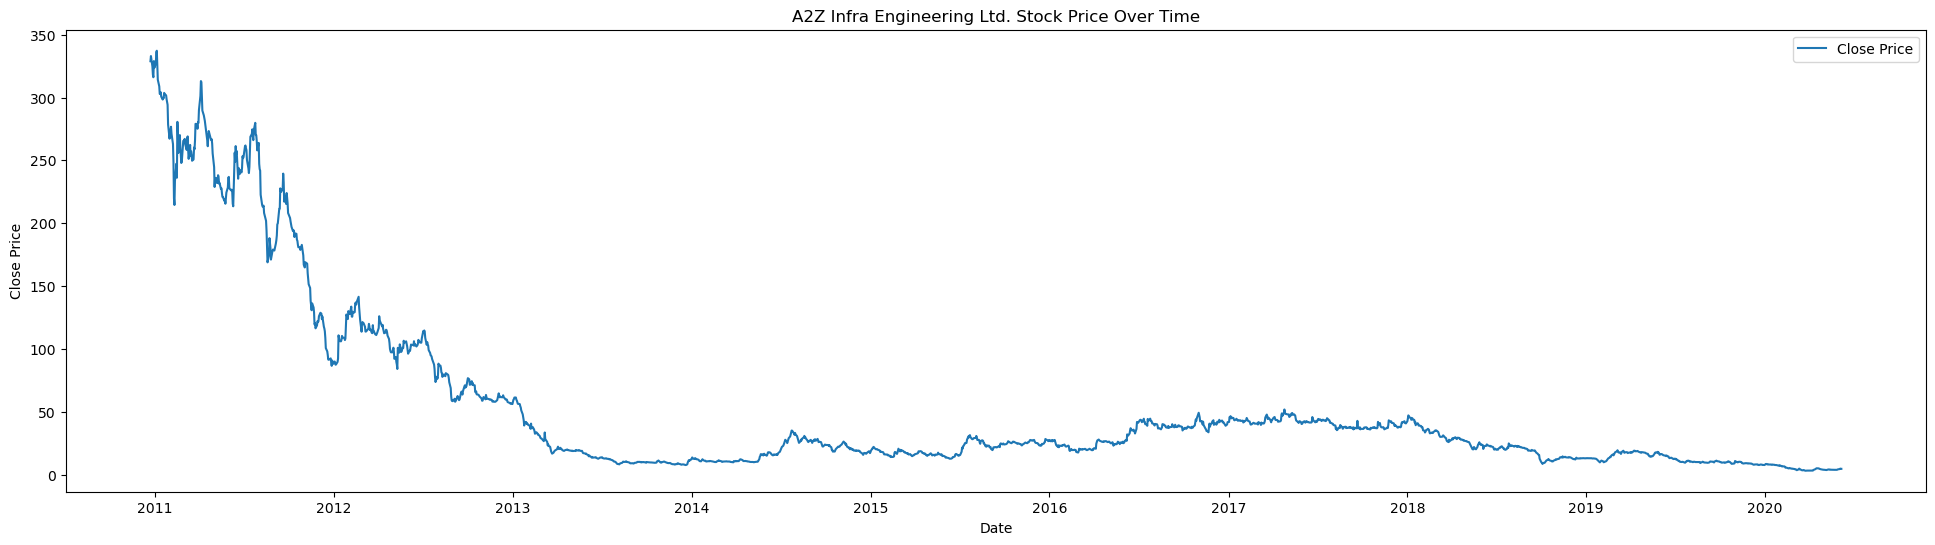

In [15]:
plt.figure(figsize=(24, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('A2Z Infra Engineering Ltd. Stock Price Over Time')
plt.legend()
plt.show()

### Volume chart

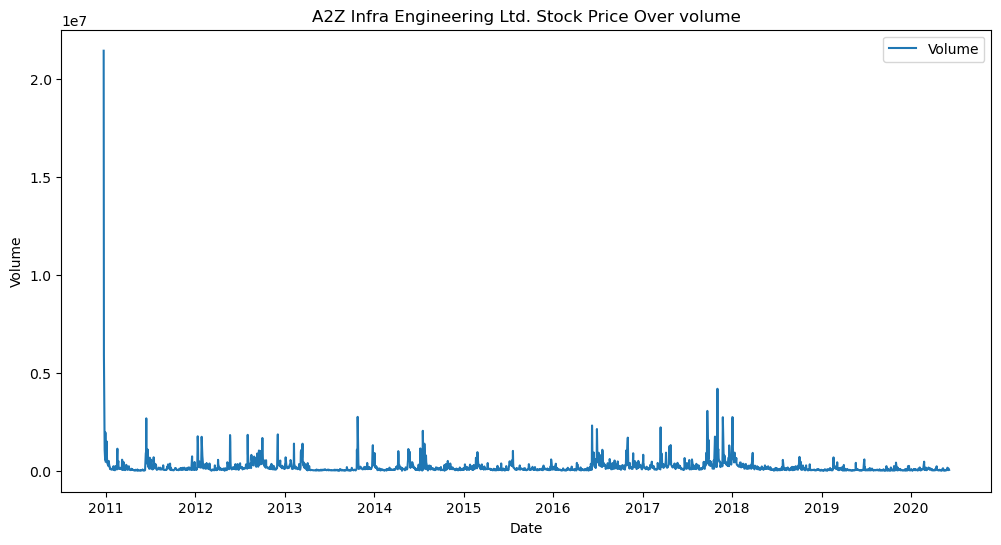

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('A2Z Infra Engineering Ltd. Stock Price Over volume')
plt.legend()
plt.show()

### Moving average

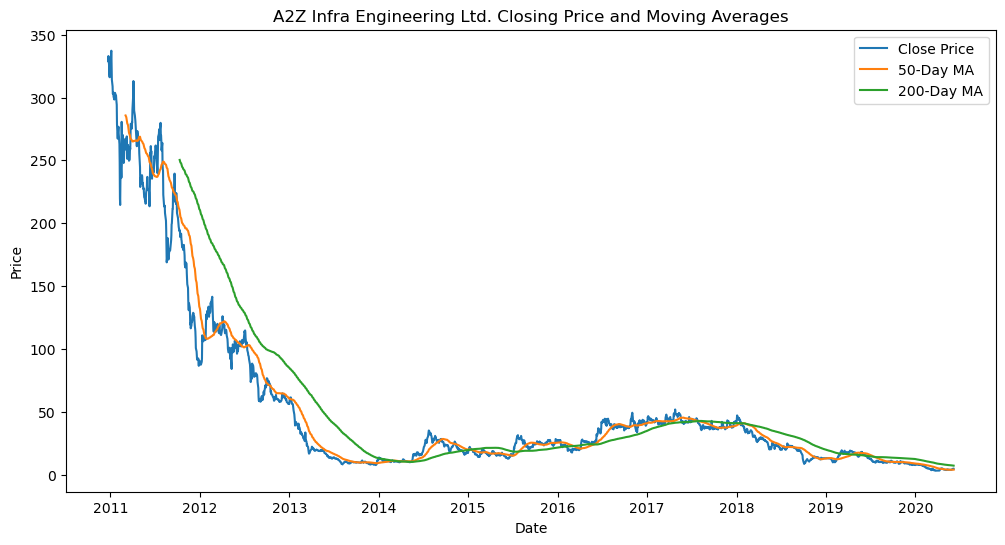

In [17]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('A2Z Infra Engineering Ltd. Closing Price and Moving Averages')
plt.legend()
plt.show()


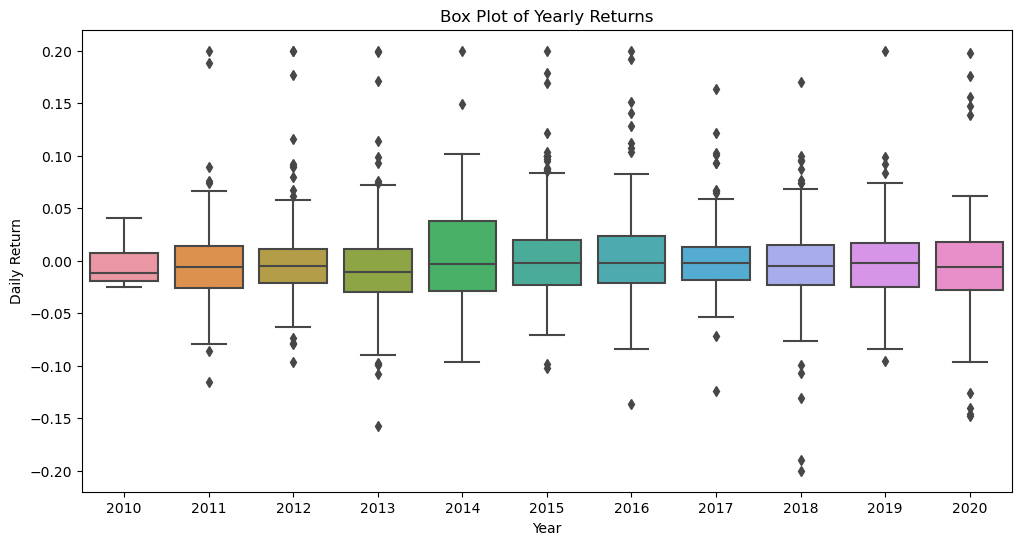

In [18]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Daily return', data=df)
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.title('Box Plot of Yearly Returns')
plt.show()


### Autocorrelation Plot

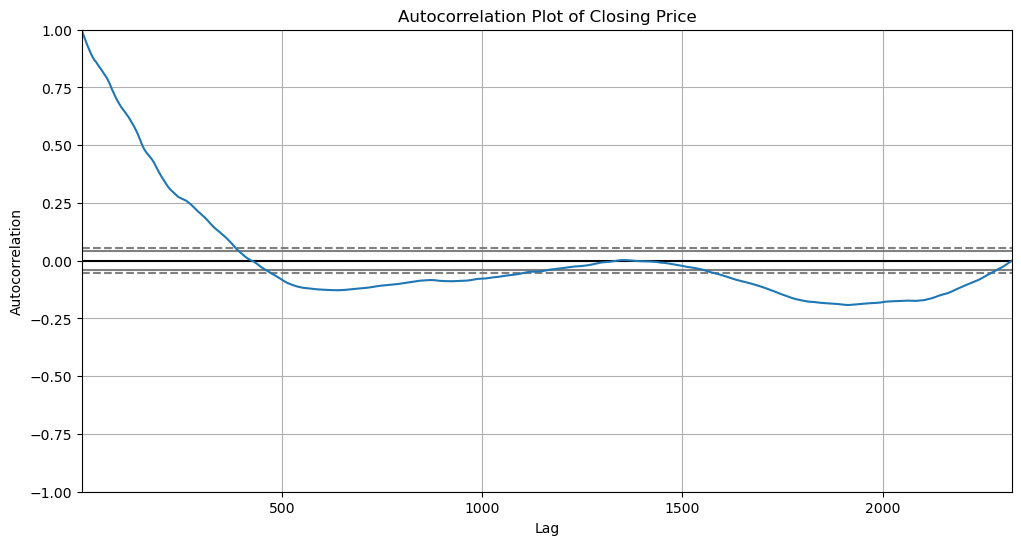

In [19]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot of Closing Price')
plt.show()

### heatmap

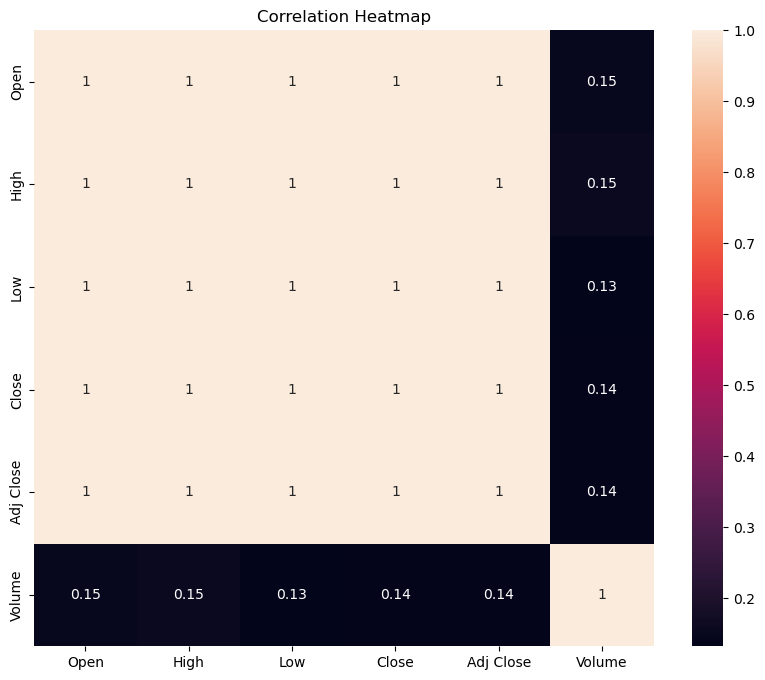

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Seasonal Decomposition

### Decompose the time series into trend, seasonal, and residual components.

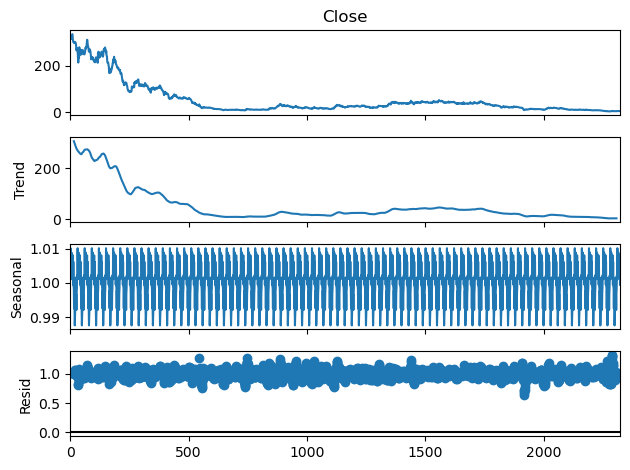

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

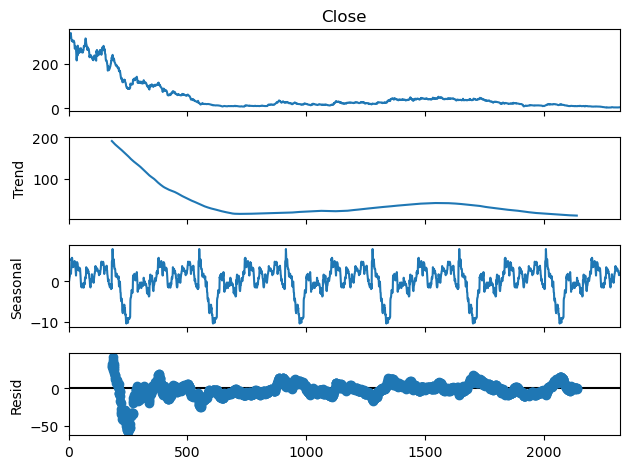

In [22]:
result2 = seasonal_decompose(df['Close'], model='additive', period=365) 
result2.plot()
plt.show()

### Check  for stationary

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily return,Year,MA50,MA200
0,2010-12-23,390.000000,398.899994,318.649994,328.899994,326.075012,21416800,NaN,2010,NaN,NaN
1,2010-12-24,331.000000,350.350006,324.399994,333.000000,330.139801,5892800,0.012466,2010,NaN,NaN
2,2010-12-27,337.000000,340.000000,320.100006,324.700012,321.911102,1069873,-0.024925,2010,NaN,NaN
3,2010-12-28,325.000000,328.899994,316.399994,318.200012,315.466919,854089,-0.020018,2010,NaN,NaN
4,2010-12-29,319.700012,322.950012,314.549988,316.149994,313.434509,562564,-0.006443,2010,NaN,NaN


In [24]:
df.drop(columns=['Daily return','Year','MA50','MA200'],inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-23,390.000000,398.899994,318.649994,328.899994,326.075012,21416800
1,2010-12-24,331.000000,350.350006,324.399994,333.000000,330.139801,5892800
2,2010-12-27,337.000000,340.000000,320.100006,324.700012,321.911102,1069873
3,2010-12-28,325.000000,328.899994,316.399994,318.200012,315.466919,854089
4,2010-12-29,319.700012,322.950012,314.549988,316.149994,313.434509,562564


In [25]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-23,390.000000,398.899994,318.649994,328.899994,326.075012,21416800
2010-12-24,331.000000,350.350006,324.399994,333.000000,330.139801,5892800
2010-12-27,337.000000,340.000000,320.100006,324.700012,321.911102,1069873
2010-12-28,325.000000,328.899994,316.399994,318.200012,315.466919,854089
2010-12-29,319.700012,322.950012,314.549988,316.149994,313.434509,562564


### Usingthe Augmented Dickey-Fuller (ADF) test to check if the series is stationary.

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
df['Close'].isna().sum()

0

In [28]:
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

ADF Statistic: -4.731954167412039
p-value: 7.325954241771338e-05
The series is likely stationary.


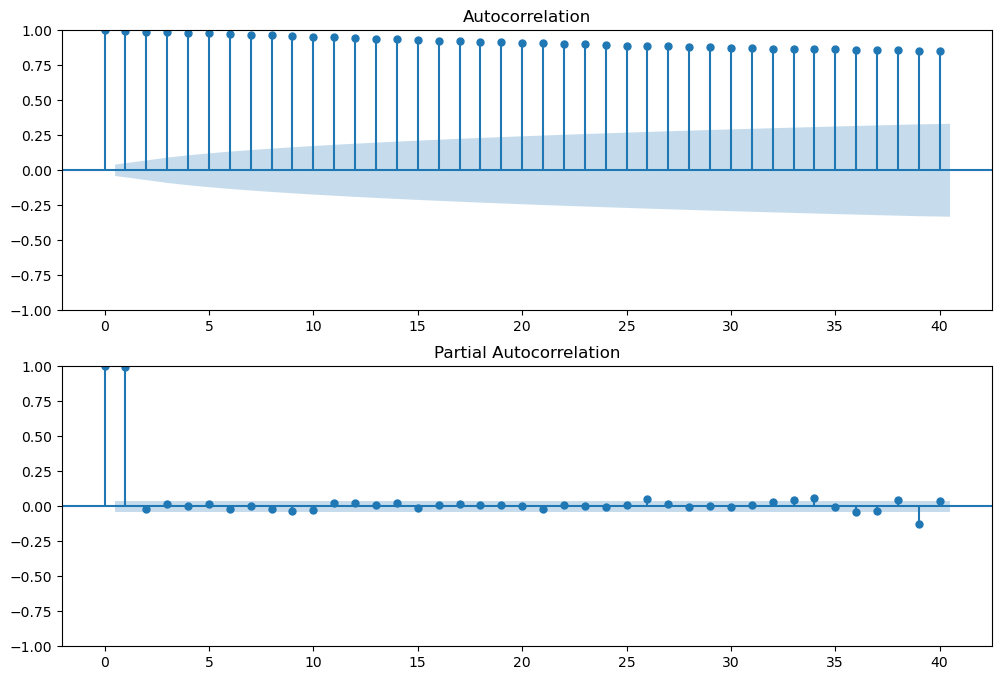

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(df['Close'], ax=ax[0], lags=40)
plot_pacf(df['Close'], ax=ax[1], lags=40)
plt.show()